Using Pytorch , I create CNN Model for abnormality detection in CT Scan Images
Loading the data - first  

Our data is stored on google drive in zipped format.I am using google Colab notebook to build the model.
I shall be directly downloading the zipped file from google using shareable link and the extracting the file using relevent packages.



In [ ]:
## direct input from google drive
url="https://drive.google.com/file/d/1jncfX2ov-k4tsM-2cPUnGRWiZvD7qXCK/view?usp=sharing"

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1jncfX2ov-k4tsM-2cPUnGRWiZvD7qXCK',
                                    dest_path='/content/sample_dataset_for_testing.tar.gz',
                                    unzip=True)


path_to_zip_file = './content/sample_dataset_for_testing.tar.gz'
directory_to_extract_to = './content/sample_dataset_for_testing'

Unzipping...

/usr/local/lib/python3.6/dist-packages/google_drive_downloader/google_drive_downloader.py:73: UserWarning: Ignoring `unzip` since "1jncfX2ov-k4tsM-2cPUnGRWiZvD7qXCK" does not look like a valid zip file
  warnings.warn('Ignoring `unzip` since "{}" does not look like a valid zip file'.format(file_id))


In [ ]:
##Extract the tar file using tarfile package
## inatll the package uisng command
###!pip3 install tarfile
import tarfile
tf = tarfile.open("/content/sample_dataset_for_testing.tar.gz", mode='r:gz')
tf.extractall()


## Importing some libraries


In [ ]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

#!pip install tifffile
import tifffile as tiff
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import shutil 



In [ ]:

# Some constants 
INPUT_FOLDER = '/content/sample_dataset_for_testing/fullsampledata/'
patients = os.listdir(INPUT_FOLDER)
patients.sort()
## remove file to clear disk space
!rm -rf sample_dataset_for_testing.tar.gz

## Data Pre-processing:

In [ ]:

slices = []
lis2=[]
lis3=[]
patients=[]
dirname = INPUT_FOLDER
final = []
for dirnam in os.listdir(dirname):
  for d2name in os.listdir(dirname+ '/' +dirnam):
    
    for fname in os.listdir(dirname+ '/' +dirnam+ '/' +d2name):
      lis2.append(fname)
      lis3.append(dirname+ '/' +dirnam+ '/' +d2name+'/'+fname)
      patients.append(d2name)


In [ ]:
patients[1]

'1.3.6.1.4.1.14519.5.2.1.6279.6001.129055977637338639741695800950'

In [ ]:

df=pd.DataFrame({'image':lis2, 'location':lis3, 'patients': patients})
df.head()
df4=df[df['image'].str.contains('_mask')==False]
df2=df[df['image'].str.contains('_mask')==True]
df3=df2["image"].str.split("_", n = 1, expand = True)
df3['location']=df2['location']
df3[1]=df2['patients']
df3[0]=df3[0].astype(str) + '.tiff'


In [ ]:
df3.rename(columns={0:'image', 1:'patients'}, inplace=True)
df3.head()

,image,patients,location
14,258.tiff,1.3.6.1.4.1.14519.5.2.1.6279.6001.129055977637...,/content/sample_dataset_for_testing/fullsample...
112,262.tiff,1.3.6.1.4.1.14519.5.2.1.6279.6001.129055977637...,/content/sample_dataset_for_testing/fullsample...
151,259.tiff,1.3.6.1.4.1.14519.5.2.1.6279.6001.129055977637...,/content/sample_dataset_for_testing/fullsample...
175,256.tiff,1.3.6.1.4.1.14519.5.2.1.6279.6001.129055977637...,/content/sample_dataset_for_testing/fullsample...
179,260.tiff,1.3.6.1.4.1.14519.5.2.1.6279.6001.129055977637...,/content/sample_dataset_for_testing/fullsample...


In [ ]:
df4.head()

,image,location,patients
0,181.tiff,/content/sample_dataset_for_testing/fullsample...,1.3.6.1.4.1.14519.5.2.1.6279.6001.129055977637...
1,41.tiff,/content/sample_dataset_for_testing/fullsample...,1.3.6.1.4.1.14519.5.2.1.6279.6001.129055977637...
2,70.tiff,/content/sample_dataset_for_testing/fullsample...,1.3.6.1.4.1.14519.5.2.1.6279.6001.129055977637...
3,302.tiff,/content/sample_dataset_for_testing/fullsample...,1.3.6.1.4.1.14519.5.2.1.6279.6001.129055977637...
4,79.tiff,/content/sample_dataset_for_testing/fullsample...,1.3.6.1.4.1.14519.5.2.1.6279.6001.129055977637...


In [ ]:

df3.drop(['image', 'patients'], axis=1)
df4.drop(['image', 'patients'], axis=1)

#suffle the data
df4= df4.sample(frac=1).reset_index(drop=True)


abnormal_train,abnormal_test,normal_train,normal_test=train_test_split(df3,df4[:62],test_size=0.25,random_state=0)
abnormal_train = abnormal_train.reset_index(drop=True)
abnormal_test = abnormal_test.reset_index(drop=True)
normal_train = normal_train.reset_index(drop=True)
normal_test = normal_test.reset_index(drop=True)
import os 
destination='/home/vinod/Desktop/CTScan/sample_testdata/train/anormal/'
count_file=0
al=0
for al in range(abnormal_train.shape[0]):
    src=abnormal_train.location[al]
    if not os.path.exists(src):
        shutil.copy(src,destination)
    else:
        count_file=count_file+1
        destination='/home/vinod/Desktop/CTScan/sample_testdata/train/abnormal/'+str(count_file)+'.tiff'
        shutil.copy(src,destination)
        
destination='/home/vinod/Desktop/CTScan/sample_testdata/test/abnormal/'
count_file=0
al=0
for al in range(abnormal_test.shape[0]):
    src=abnormal_test.location[al]
    if not os.path.exists(src):
        shutil.copy(src,destination)
    else:
        count_file=count_file+1
        destination='/home/vinod/Desktop/CTScan/sample_testdata/test/abnormal/'+str(count_file)+'.tiff'
        shutil.copy(src,destination)
al=0       
destination='/home/vinod/Desktop/CTScan/sample_testdata/train/normal/'
count_file=0
for al in range(normal_train.shape[0]):
    src=normal_train.location[al]
    if not os.path.exists(src):
        shutil.copy(src,destination)
    else:
        count_file=count_file+1
        destination='/home/vinod/Desktop/CTScan/sample_testdata/train/normal/'+str(count_file)+'.tiff'
        shutil.copy(src,destination)

destination='/home/vinod/Desktop/CTScan/sample_testdata/test/normal/'
al=0
count_file=0
for al in range(normal_test.shape[0]):
    src=normal_test.location[al]
    if not os.path.exists(src):
        shutil.copy(src,destination)
    else:
        count_file=count_file+1
        destination='/home/vinod/Desktop/CTScan/sample_testdata/test/normal/'+str(count_file)+'.tiff'
        shutil.copy(src,destination)


In [ ]:
# Loading the data - DataLoader

import torch
#use_cuda = True

import torchvision
train_dataset = torchvision.datasets.ImageFolder(
    root='/home/vinod/Desktop/CTScan/sample_testdata/train/',
    transform=torchvision.transforms.ToTensor()
)
train_loader =  torch.utils.data.DataLoader(
    train_dataset,
    batch_size=16,
    num_workers=1
)
valid_dataset = torchvision.datasets.ImageFolder(
    root='/home/vinod/Desktop/CTScan/sample_testdata/test/',
    transform=torchvision.transforms.ToTensor()
)
valid_loader =  torch.utils.data.DataLoader(
    train_dataset,
    batch_size=16,
    num_workers=1
)



## Visualize one slice

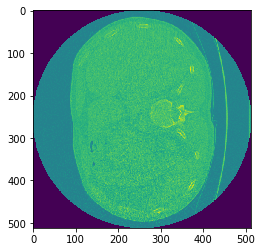

In [ ]:
from skimage import io
import matplotlib.pyplot as plt

struct_arr = io.imread("/home/vinod/Desktop/CTScan/sample_dataset_for_testing/fullsampledata/subset0mask/1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260/1.tiff")

                      
struct_arr2 = struct_arr.T
plt.imshow(struct_arr2)